In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
sns.set_style("whitegrid")

In [36]:
path = '../../data/02-01-2020.csv'

In [37]:
df = pd.read_csv(path)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Province/State  66 non-null     object
 1   Country/Region  88 non-null     object
 2   Last Update     88 non-null     object
 3   Confirmed       88 non-null     int64 
 4   Deaths          88 non-null     int64 
 5   Recovered       88 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 4.2+ KB


In [39]:
df.isnull().sum()

Province/State    22
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [40]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2/1/2020 11:53,7153,249,168
1,Zhejiang,Mainland China,2/1/2020 10:53,599,0,21
2,Guangdong,Mainland China,2/1/2020 14:23,535,0,14
3,Henan,Mainland China,2/1/2020 1:52,422,2,3
4,Hunan,Mainland China,2/1/2020 11:03,389,0,8


In [41]:
df[df['Country/Region'] == 'US'].head(10)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
48,"Chicago, IL",US,2/1/2020 19:43,2,0,0
60,"Boston, MA",US,2/1/2020 19:43,1,0,0
61,"Los Angeles, CA",US,2/1/2020 19:53,1,0,0
62,"Orange, CA",US,2/1/2020 19:53,1,0,0
63,"Santa Clara, CA",US,2/1/2020 19:53,1,0,0
64,"Seattle, WA",US,2/1/2020 19:43,1,0,0
65,"Tempe, AZ",US,2/1/2020 19:43,1,0,0


In [42]:
df[df['Country/Region'] == 'Canada'].head(10)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
44,Ontario,Canada,2/1/2020 18:12,3,0,0
51,British Columbia,Canada,2/1/2020 18:12,1,0,0


In [43]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [44]:
# check just the number of deaths in the US
df[df['Country/Region'] == 'US']['Deaths'].sum()

0

In [45]:
df[df['Country/Region'] == 'Canada']['Deaths'].sum()

0

<AxesSubplot:>

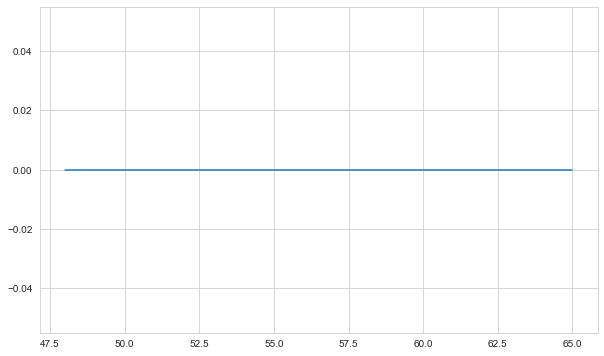

In [46]:
df[df['Country/Region'] == 'US']["Deaths"].plot(kind='line', figsize=(10, 6))

<AxesSubplot:>

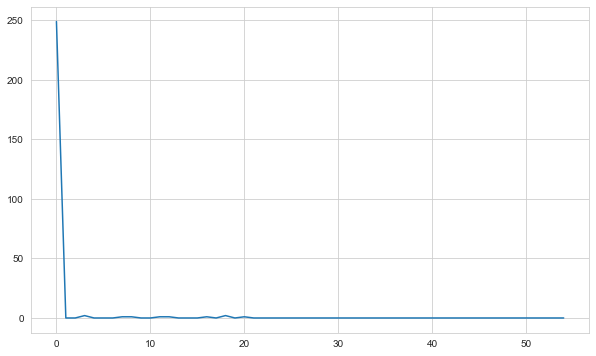

In [47]:
df[df['Country/Region'] == 'Mainland China']["Deaths"].plot(kind='line', figsize=(10, 6))

In [48]:
df['Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

In [49]:
df['Country/Region']

0        China
1        China
2        China
3        China
4        China
        ...   
83    Malaysia
84    Malaysia
85    Malaysia
86    Malaysia
87    Malaysia
Name: Country/Region, Length: 88, dtype: object

In [50]:
df['Country/Region'].unique()

array(['China', 'Japan', 'Thailand', 'Singapore', 'Hong Kong',
       'South Korea', 'Taiwan', 'Germany', 'Macau', 'France', 'Vietnam',
       'Australia', 'United Arab Emirates', 'Canada', 'Italy', 'Russia',
       'UK', 'US', 'Cambodia', 'Finland', 'India', 'Nepal', 'Philippines',
       'Spain', 'Sri Lanka', 'Sweden', 'Kiribati', 'Palau', 'New Zealand',
       'Summer Olympics 2020', 'Malaysia'], dtype=object)

<AxesSubplot:>

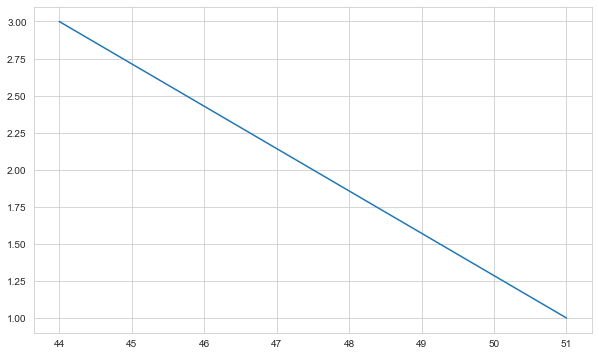

In [51]:
df[df['Country/Region'] == 'Canada']['Confirmed'].plot(kind='line', figsize=(10, 6))

In [52]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

<AxesSubplot:>

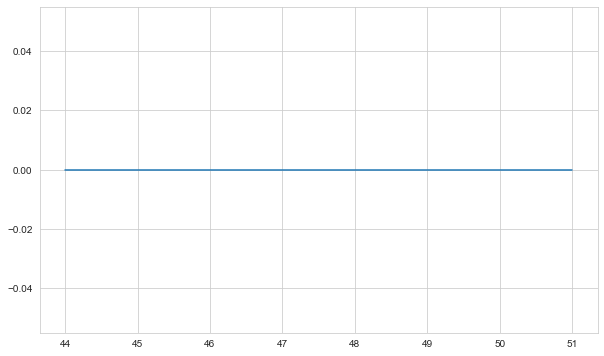

In [53]:
df[df['Country/Region'] == 'Canada']['Recovered'].plot(kind='line', figsize=(10, 6))

In [54]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,China,2/1/2020 11:53,7153,249,168
1,Zhejiang,China,2/1/2020 10:53,599,0,21
2,Guangdong,China,2/1/2020 14:23,535,0,14
3,Henan,China,2/1/2020 1:52,422,2,3
4,Hunan,China,2/1/2020 11:03,389,0,8


In [55]:
df.drop(['Province/State', 'Last Update'], axis=1, inplace=True)

In [56]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered
0,China,7153,249,168
1,China,599,0,21
2,China,535,0,14
3,China,422,2,3
4,China,389,0,8


In [57]:
df.rename(columns={'Country/Region': 'Country'}, inplace=True)

In [58]:
df.head(20)

,Country,Confirmed,Deaths,Recovered
0,China,7153,249,168
1,China,599,0,21
2,China,535,0,14
3,China,422,2,3
4,China,389,0,8
5,China,297,0,5
6,China,286,0,9
7,China,247,1,3
8,China,207,1,3
9,China,206,0,3


In [59]:
labels = ['Country', 'Confirmed', 'Deaths', 'Recovered']
world = df.groupby('Country')[labels].sum().reset_index()

In [60]:
world.head()

,Country,Confirmed,Deaths,Recovered
0,Australia,12,0,2
1,Cambodia,1,0,0
2,Canada,4,0,0
3,China,11871,259,275
4,Finland,1,0,0


In [61]:
world.sort_values(by='Confirmed', ascending=False).head(10)

,Country,Confirmed,Deaths,Recovered
3,China,11871,259,275
10,Japan,20,0,1
26,Thailand,19,0,8
19,Singapore,16,0,0
7,Hong Kong,13,0,0
0,Australia,12,0,2
20,South Korea,12,0,0
25,Taiwan,10,0,0
28,US,8,0,0
6,Germany,8,0,0


In [62]:
world[world['Country'] == 'Canada'].sort_values(by='Confirmed', ascending=False)

,Country,Confirmed,Deaths,Recovered
2,Canada,4,0,0


<AxesSubplot:>

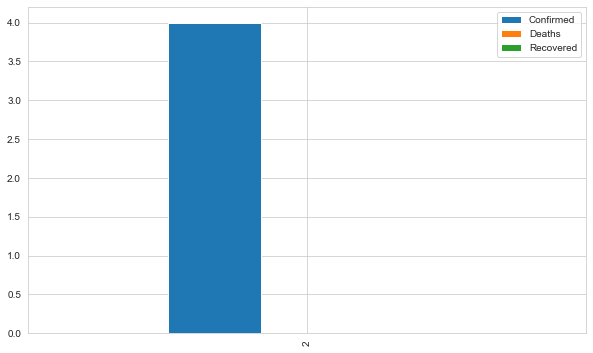

In [63]:
world[world['Country'] == 'Canada'].sort_values(by='Confirmed', ascending=False).plot(kind='bar', figsize=(10, 6))

In [64]:
import plotly.express as px

In [65]:
%pip install --upgrade nbformat

You should consider upgrading via the '/Users/roblivesinottawa/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [66]:
fig = px.scatter_geo(world,
                        locations="Country",
                        color="Confirmed",
                        hover_name="Country",
                        size="Confirmed",
                        projection="natural earth")
                        
fig.show()

<AxesSubplot:>

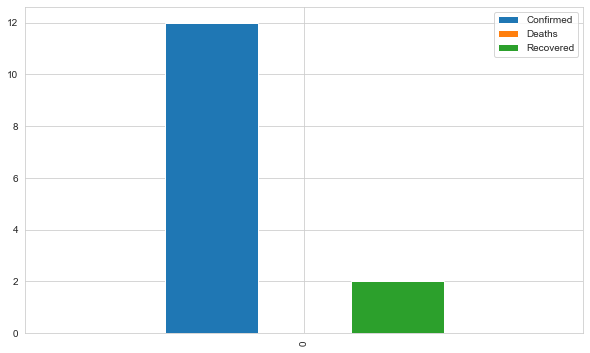

In [67]:
world[world['Country'] == 'Australia'].sort_values(by='Confirmed', ascending=False).plot(kind='bar', figsize=(10, 6))

<AxesSubplot:>

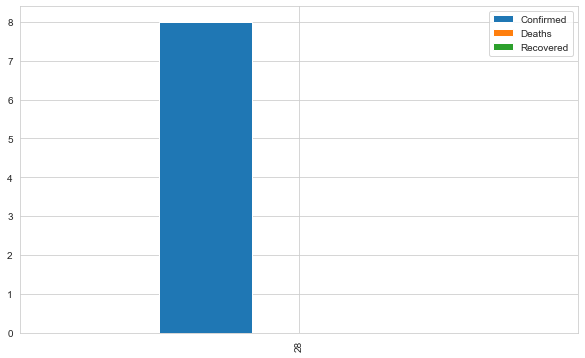

In [69]:
world[world['Country'] == 'US'].sort_values(by='Confirmed', ascending=False).plot(kind='bar', figsize=(10, 6))

In [70]:
# find the 10 countries with the most confirmed cases
world.sort_values(by='Confirmed', ascending=False).head(10)

,Country,Confirmed,Deaths,Recovered
3,China,11871,259,275
10,Japan,20,0,1
26,Thailand,19,0,8
19,Singapore,16,0,0
7,Hong Kong,13,0,0
0,Australia,12,0,2
20,South Korea,12,0,0
25,Taiwan,10,0,0
28,US,8,0,0
6,Germany,8,0,0


In [71]:
world.sort_values(by='Confirmed', ascending=True).head(10)

,Country,Confirmed,Deaths,Recovered
15,New Zealand,0,0,0
13,Malaysia,0,0,0
11,Kiribati,0,0,0
16,Palau,0,0,0
23,Summer Olympics 2020,0,0,0
14,Nepal,1,0,0
21,Spain,1,0,0
8,India,1,0,0
24,Sweden,1,0,0
4,Finland,1,0,0


<AxesSubplot:xlabel='Country', ylabel='Confirmed'>

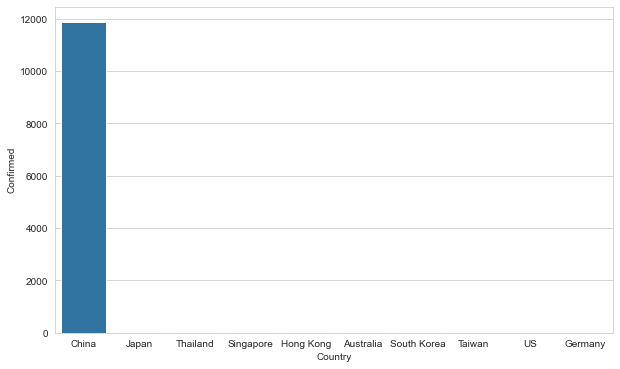

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Confirmed', data=world.sort_values(by='Confirmed', ascending=False).head(10))

In [75]:
top_ten = world.sort_values(by='Confirmed', ascending=False).head(10)
top_ten.head(10)

,Country,Confirmed,Deaths,Recovered
3,China,11871,259,275
10,Japan,20,0,1
26,Thailand,19,0,8
19,Singapore,16,0,0
7,Hong Kong,13,0,0
0,Australia,12,0,2
20,South Korea,12,0,0
25,Taiwan,10,0,0
28,US,8,0,0
6,Germany,8,0,0


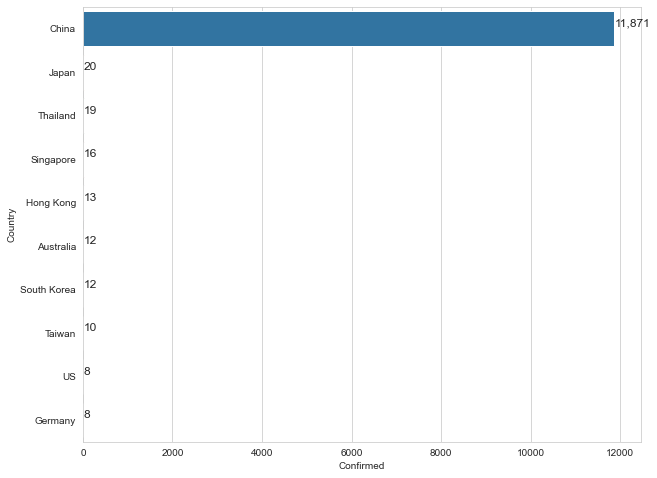

In [79]:
plt.figure(figsize=(10, 8))
plot = sns.barplot(x='Confirmed', y='Country', data=top_ten)
for i, (value, name) in enumerate(zip(top_ten['Confirmed'], top_ten['Country'])):
    plot.text(value, i-0.05, f"{value:,.0f}", size=12)

plt.show()

In [80]:
# find the five countries with the most confirmed cases
top_five = world.sort_values(by='Confirmed', ascending=False).head(5)
top_five.head(5)

,Country,Confirmed,Deaths,Recovered
3,China,11871,259,275
10,Japan,20,0,1
26,Thailand,19,0,8
19,Singapore,16,0,0
7,Hong Kong,13,0,0


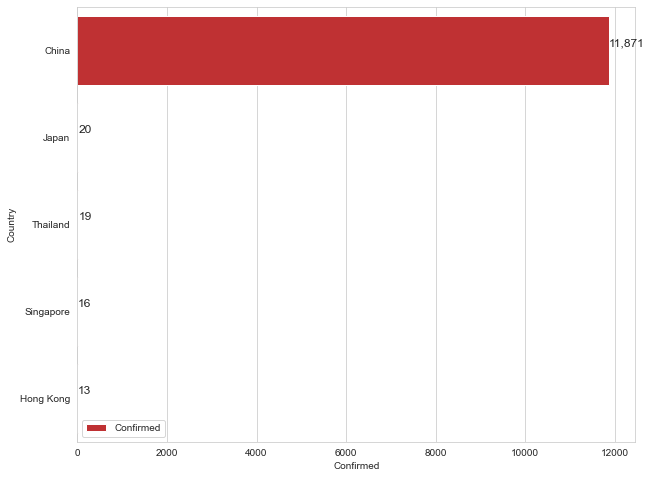

In [82]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Confirmed', y='Country', data=top_five, color='#d7191c', label='Confirmed')
for i, (value, name) in enumerate(zip(top_five['Confirmed'], top_five['Country'])):
    plt.text(value, i-0.05, f"{value:,.0f}", size=12)

plt.legend(loc='best')
plt.show()

In [87]:
# plotting a choropleth map
fig = px.choropleth(world, 
                    locations="Country", 
                    locationmode="country names",
                    color="Confirmed", 
                    hover_name="Country",
                    color_continuous_scale="Viridis",
                    range_color=(0, 1000000),
                    title="COVID-19 Confirmed Cases")

fig.show()